In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model as lm

# foucus on PM2.5

fs = pd.read_csv('E:/working/DataMining/fangshan.csv')
fs = fs.drop(['weather', 'station_id', 'longitude', 'latitude', 'PM10', 'NO2', 'CO', 'O3', 'SO2'], axis=1)

def feature_vector(df, feature, N):
    rows = df.shape[0]
    column_n = [None] * N + [df[feature][i - N] for i in range(N, rows)]
    column_name = "{}_{}".format(feature, N)
    df[column_name] = column_n

fs = fs.drop(['utc_time',], axis=1)

for feature in ['PM2.5', 'temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed']:
    for N in range(1, 4):
        feature_vector(fs, feature, N)
        
fs = fs.drop(['temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed'], axis=1)
fs = fs[3:].reset_index(drop=True)

fs.head()

,PM2.5,PM2.5_1,PM2.5_2,PM2.5_3,temperature_1,temperature_2,temperature_3,pressure_1,pressure_2,pressure_3,humidity_1,humidity_2,humidity_3,wind_direction_1,wind_direction_2,wind_direction_3,wind_speed_1,wind_speed_2,wind_speed_3
0,118.0,117.0,116.0,114.0,-2.8,-2.7,-2.6,1025.6,1025.8,1026.1,17.0,15.0,14.0,228.0,217.0,215.0,3.2,3.5,3.3
1,118.0,118.0,117.0,116.0,-2.8,-2.8,-2.7,1025.0,1025.6,1025.8,18.0,17.0,15.0,228.0,228.0,217.0,1.8,3.2,3.5
2,106.0,118.0,118.0,117.0,-3.1,-2.8,-2.8,1024.1,1025.0,1025.6,17.0,18.0,17.0,209.0,228.0,228.0,2.4,1.8,3.2
3,110.0,106.0,118.0,118.0,-3.9,-3.1,-2.8,1023.9,1024.1,1025.0,19.0,17.0,18.0,216.0,209.0,228.0,1.7,2.4,1.8
4,122.0,110.0,106.0,118.0,-4.7,-3.9,-3.1,1023.2,1023.9,1024.1,23.0,19.0,17.0,233.0,216.0,209.0,0.4,1.7,2.4


In [2]:
def score(estimator, X, y):
    y_prediction = estimator.predict(X)
    return np.sum(np.abs(y_prediction - y) / (np.abs(y_prediction) + np.abs(y))) / y.shape[0] 

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV

features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'temperature_1', 'temperature_2', 'temperature_3',
              'pressure_1', 'pressure_2', 'pressure_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_direction_1', 'wind_direction_2', 'wind_direction_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']

X = fs[features]
y = fs[['PM2.5']]

ridge_param={'alpha': [0.4, 0.5, 0.6, 0.7]}
grid = GridSearchCV(estimator = lm.Ridge(), param_grid = ridge_param, scoring = score, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(score(grid, X_test, y_test))

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.120091932882
PM2.5    0.124156
dtype: float64


In [3]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3']
X = fs[features]
y = fs[['PM2.5']]
grid = GridSearchCV(estimator = lm.Ridge(), param_grid = ridge_param, scoring = score, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(score(grid, X_test, y_test))

0.113583548228
PM2.5    0.121198
dtype: float64


In [4]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']
X = fs[features]
y = fs[['PM2.5']]
grid = GridSearchCV(estimator = lm.Ridge(), param_grid = ridge_param, scoring = score, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(score(grid, X_test, y_test))

0.119455680667
PM2.5    0.122925
dtype: float64


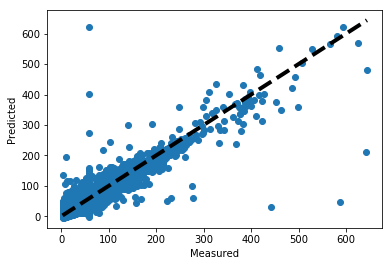

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(grid, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [6]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3']
y = np.array(fs['PM2.5'])
X = np.array(fs[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
lasso_param={'alpha':[0.1, 0.2, 0.3, 0.4]}
grid = GridSearchCV( estimator = lm.Lasso(), param_grid = lasso_param, scoring = score, cv=5)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(score(grid, X_test, y_test))


0.113582160488
0.121199688542


In [7]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']
X = np.array(fs[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(score(grid, X_test, y_test))

0.118534740152
0.122379016924


In [8]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'temperature_1', 'temperature_2', 'temperature_3',
              'pressure_1', 'pressure_2', 'pressure_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_direction_1', 'wind_direction_2', 'wind_direction_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']
X = np.array(fs[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(score(grid, X_test, y_test))

0.119182923522
0.123447018479


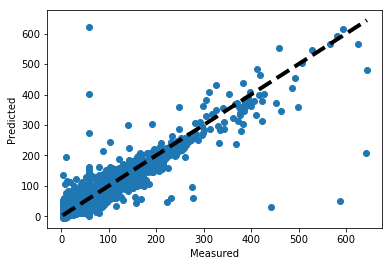

In [9]:
predicted = cross_val_predict(grid, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()